# Wrangle: [testfit.io](https://blog.testfit.io/)

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))

## Stakeholder Notes
- Work with Commitments
- Activity Descriptions == New Construction, SubRehab, Additions, and Improvements
- Loan amount >= $1M:
    - Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance?
    - Mortgage at Firm Commitment Issuance?
    - Final Mortgage Amount? **Probably this one...**
- Market == Large urban centers; meaning **cities** not just states; not rural one-off projects
- Types of FHA loan is irrelevant

In [3]:
# commitments
df  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
print(df.shape)
df.head()

(20918, 29)


,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [4]:
df.to_csv("hud_commitments.csv")

In [5]:
df.rename(columns={"Activity Group": "activity_group"}, inplace=True)

In [6]:
# activity_groups
df = df[(df.activity_group == "NC/SR") | (df.activity_group == "Imp/Adds")]

In [7]:
# df = df[df["Final Mortgage Amount"] >= 1000000]
# df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 5 to 20909
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   FHA Number                                                             3934 non-null   int64         
 1   Project Name                                                           3934 non-null   object        
 2   Project City                                                           3934 non-null   object        
 3   Project State                                                          3934 non-null   object        
 4   Basic FHA, Risk Share or Other                                         3934 non-null   object        
 5   Program Category                                                       3934 non-null   object        
 6   Activity Description           

In [9]:
df["Activity Description"].value_counts()

New Construction    2465
SubRehab            1418
Purchase              25
Refinance             24
Improvements           1
Additions              1
Name: Activity Description, dtype: int64

In [10]:
df["activity_group"].value_counts()

NC/SR    3934
Name: activity_group, dtype: int64

In [11]:
df.rename(columns={"Facility Type": "facility_type"}, inplace=True)

In [12]:
df.facility_type.value_counts()

Apts                            2689
Coop/Apts/Mobile Home Pk/ALF     790
Asst'd Livg                      211
Nursing/ICF                      106
Coop                              71
Hospital                          47
Apts/Coops                        10
Mobile Home Pk                     5
SRO                                3
Board & Care                       2
Name: facility_type, dtype: int64

In [13]:
df.rename(columns={"FHA Number": "fha_number"}, inplace=True)

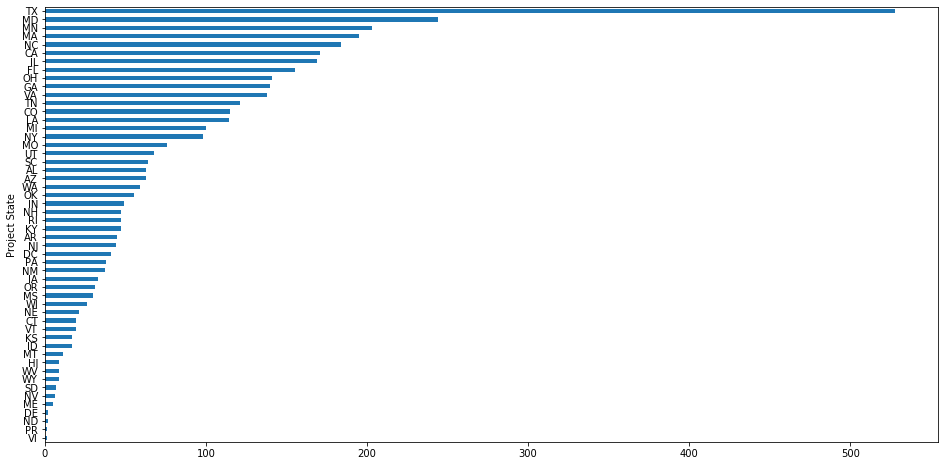

In [14]:
df.groupby(["Project State"]).fha_number.count().sort_values().plot.barh()
plt.show()

In [15]:
df[df["Final Mortgage Amount"] >= 1000000].shape

(3856, 29)

In [16]:
df.rename(columns={"Final Mortgage Amount": "final_mortgage"}, inplace=True)

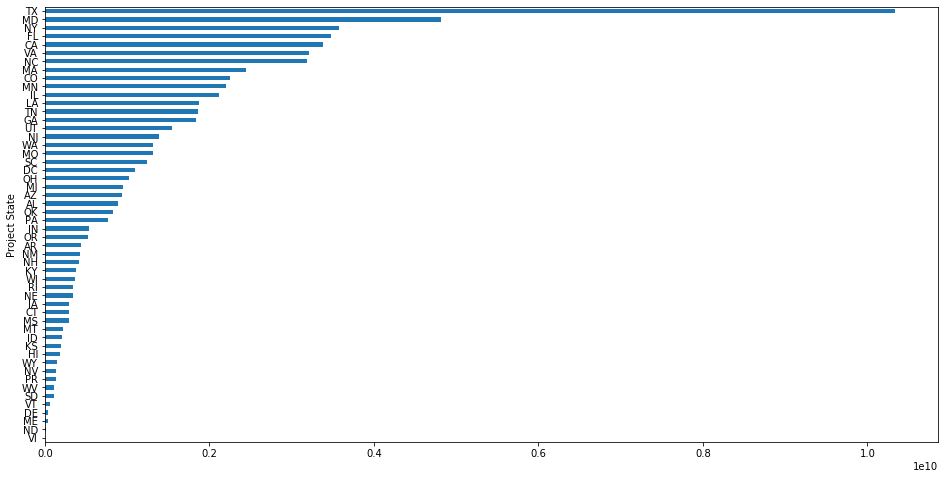

In [17]:
df.groupby(["Project State"]).final_mortgage.sum().sort_values().plot.barh()

In [18]:
df["Project City"].value_counts().head(20)

Chicago        65
Baltimore      53
San Antonio    48
Boston         47
Washington     40
Minneapolis    36
Atlanta        35
Austin         35
Cleveland      30
Denver         28
Dallas         28
Columbus       27
Charlotte      23
Los Angeles    23
Nashville      23
Kansas City    22
St. Louis      22
Knoxville      21
Columbia       21
Fort Worth     21
Name: Project City, dtype: int64

In [19]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"]).size().sort_values()

Project City  Fiscal Year of Firm Commitment
55435         2018                               1
New York      2018                               1
New Your      2019                               1
New orleans   2011                               1
Newark        2009                               1
                                                ..
Austin        2018                               8
Boston        2019                               8
San Antonio   2019                               9
Boston        2020                              10
Baltimore     2016                              12
Length: 3050, dtype: int64

In [20]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"])["final_mortgage"].sum().sort_values()

Project City              Fiscal Year of Firm Commitment
roxbury                   2010                                      1
Covington                 2006                                 125000
Butler                    2006                                 200000
Central City              2006                                 240400
London                    2006                                 250000
                                                              ...    
Columbus                  2011                              295893700
Cumberland                2006                              341358700
Queens                    2020                              361055000
Long Island City, Queens  2019                              386525000
Trenton                   2009                              759974500
Name: final_mortgage, Length: 3050, dtype: int64

In [21]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006     14083843
2007      7510000
2009     18128300
2010     21478400
2011     19887200
2012     14378600
2013     81963100
2014    108262100
2015     22859500
2016     18903400
2017     67822400
2018    253451500
2019     68095900
2020    146431700
Name: final_mortgage, dtype: int64

In [22]:
df[df["Project City"] == "Minneapolis"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006    14121493
2007     2375000
2008    14829000
2010    25523000
2011    80448842
2012    55004500
2013    22876500
2014    62015800
2015    38850700
2016    51137000
2017    42034400
2018    62178200
2019    34185200
Name: final_mortgage, dtype: int64

In [23]:
# csv works and can be read
pd.read_csv("hud_commitments.csv", index_col=0)

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,12711269,Quail Run Apartments,Vancouver,WA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,Firm Issued,SUNTRUST BANK,17051600,129,2020-03-31,2020,17051600,2020-03-31,2020,MAP,Y,0,0,0,0,0,0,Firm Issued,17051600
20914,2210003,Legacy Memory Care,Falmouth,ME,Basic FHA,232 Health Care,Additions,Impv/Adds,Asst'd Livg,ALF 241a,Firm Issued,PRUDENTIAL HUNTOON PAIGE,1189200,30,2020-03-31,2020,1189200,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,1189200
20915,6722256,Consulate Health Care of Kissimmee,Kissimmee,FL,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,Firm Issued,ORIX REAL ESTATE CAPITAL LLC,17920000,120,2020-03-31,2020,17920000,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,17920000
20916,11322284,The Villages of Lake Highlands,Dallas,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,Firm Issued,ORIX REAL ESTATE CAPITAL LLC,20756500,154,2020-03-31,2020,20756500,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,20756500
